In [1]:
import cv2
import os
import numpy as np
import os
import mediapipe
import matplotlib.pyplot as plt
from icecream import ic

In [2]:
img_path  = "/home/nipun/Documents/Uni_Malta/Datasets/columbia_gaze_data_set/ColumbiaGazeDataSet/0009/0009_2m_0P_-10V_-10H.jpg"

# 0009_2m_0P_0V_-5H.jpg
# 0009_2m_0P_-10V_5H.jpg

#0009_2m_0P_10V_0H.jpg

In [3]:
img_name = img_path.split("/")[-1]

def distanceFromOriginToAngle(img_name):
    
    distanceBetweenAngle = [21.87,44.08,66.99]
    
    angleRange = 5
    
    angleAmount = abs(float(img_name.split(".")[0].split("_")[-1][:-1]))
    
    if angleAmount == 0.0 :
        return 0
    else:
        
        if angleAmount == 5.0:
            return distanceBetweenAngle[0]
        elif angleAmount ==10.0:
            return distanceBetweenAngle[1]
        else:
            return distanceBetweenAngle[2]

    
distanceFromOrigin = distanceFromOriginToAngle(img_name)


In [4]:
def captureFaceLandmarks(frame):

    results = face_mesh.process(frame)
    landmarks = results.multi_face_landmarks[0]

    shape_arr = []

    for landmark in landmarks.landmark:

        x = landmark.x
        y = landmark.y

        relative_x = int(x * frame.shape[1])
        relative_y = int(y * frame.shape[0])

        shape_arr.append([relative_x, relative_y])

    return np.array(shape_arr)

In [5]:
mp_face_mesh = mediapipe.solutions.face_mesh

face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [6]:
img = cv2.imread(img_path)


In [7]:
shape_array = captureFaceLandmarks(img)

In [8]:
def calculateEyeCorners(shape_arr):

    dMid = [abs((shape_array[133][0]+shape_array[362][0])//2),abs((shape_array[133][1]+shape_array[362][1])//2)]
    
    dMidLeft = [abs((shape_array[133][0]+shape_array[33][0])//2),abs((shape_array[133][1]+shape_array[33][1])//2)]
    
    dMidRight = [abs((shape_array[362][0]+shape_array[263][0])//2),abs((shape_array[362][1]+shape_array[263][1])//2)]
    
    
    
    
    return dMid, dMidLeft, dMidRight
    
    


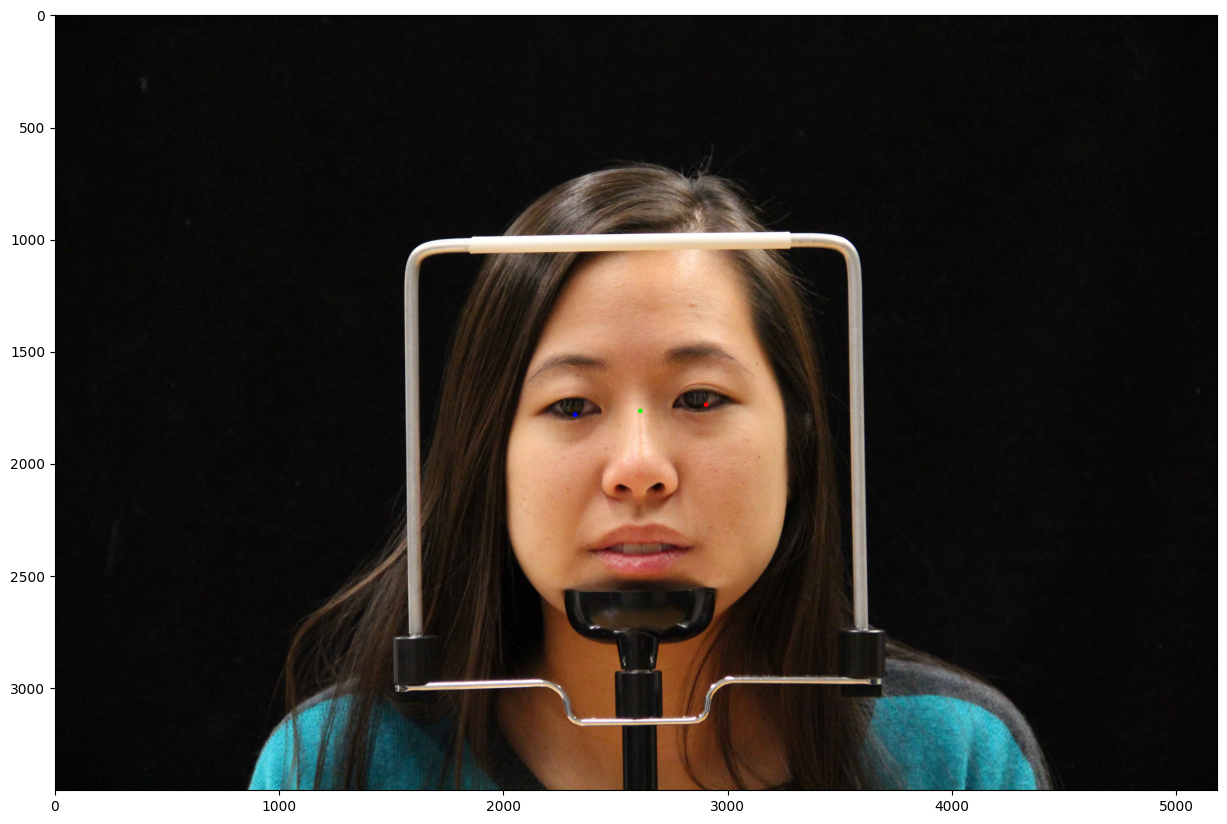

In [9]:
dMid, dMidLeft, dMidRight = calculateEyeCorners(shape_array)


cv2.circle(img,(dMid[0],dMid[1]),10,(0,255,0),-1) # Dmid



cv2.circle(img,(dMidLeft[0],dMidLeft[1]),10,(255,0,0),-1) # DMidLeft


cv2.circle(img,(dMidRight[0],dMidRight[1]),10,(0,0,255),-1) # DMidRight


plt.figure(figsize=(15,15))
plt.imshow(img[:,:,::-1])


In [10]:
pixelPerMM = 5.9/116


In [11]:
((dMid[0] - dMidLeft[0]) *pixelPerMM)/10

1.480086206896552

In [12]:
(( dMidRight[0] -dMid[0]) *pixelPerMM)/10

1.4902586206896553

In [13]:
adjacentDistance = 250

In [14]:
(21.87 - (((dMid[0] - dMidLeft[0]) *pixelPerMM)/10) )/distance

NameError: name 'distance' is not defined

In [15]:
(21.87 +(( dMidRight[0] -dMid[0]) *pixelPerMM)/10 )/distance

NameError: name 'distance' is not defined

In [19]:


def calCThetaAngle(img_name, dmid, dmidLeft, dmidRight, distance):

    dLeft = ((dmid[0]-dmidLeft[0]) * pixelPerMM)/10

    dRight = ((dmidRight[0] - dmid[0]) * pixelPerMM)/10

    angleAmount = float(img_name.split(".")[0].split("_")[-1][:-1])
    
    print(angleAmount)

    left_opposite = 0
    right_opposite = 0

    if angleAmount < 0:

        left_opposite = distance - dLeft
        right_opposite = distance + dRight

    elif angleAmount > 0:
        left_opposite = distance + dLeft
        right_opposite = distance - dRight

    else:
        left_opposite = dLeft
        right_opposite = dRight

    left_theta = np.degrees(np.arctan(left_opposite/adjacentDistance))
    right_theta = np.degrees(np.arctan(right_opposite/adjacentDistance))

    return left_theta, right_theta


In [20]:
left_theta,right_theta = calCThetaAngle(img_name,dMid, dMidLeft, dMidRight,distanceFromOrigin)

-10.0


In [18]:
ic(left_theta)
ic(right_theta)

ic| left_theta: 9.670299219808427
ic| right_theta: 10.330515256097758


10.330515256097758

In [ ]:
#0009_2m_0P_-10V_-10H.jpg